In [ ]:
import pandas as pd
import numpy as np
import re

In [ ]:
df= pd.read_csv('dataset_pln_mobile.csv',encoding = 'latin-1')
df.drop(columns = ['userName','at','score'],inplace = True)
df.columns = ['Ulasan','Sentimen']
df.head()

,Ulasan,Sentimen
0,Sangat responsif dalam menanggapi masalah lapo...,Positif
1,"Aplikasinya Sangat bagus, bisa cek tagihan lis...",Positif
2,Dengan pln mobile semua urusan listrik jadi le...,Positif
3,"Aplikasi PLN mobile sangat bagus, sangat memba...",Positif
4,Fitur yang sering saya gunakan yaitu pembelian...,Positif


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375 entries, 0 to 1374
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Ulasan    1375 non-null   object
 1   Sentimen  1375 non-null   object
dtypes: object(2)
memory usage: 21.6+ KB


# **CLEANING**


In [ ]:
df['Ulasan']=df['Ulasan'].apply(str)
def clean_text(text):
  return re.sub(r'[^a-zA-Z\s]', ' ',text)

df['cleaned_text'] = df['Ulasan'].apply(lambda x: clean_text(x))

df.head(10)

,Ulasan,Sentimen,cleaned_text
0,Sangat responsif dalam menanggapi masalah lapo...,Positif,Sangat responsif dalam menanggapi masalah lapo...
1,"Aplikasinya Sangat bagus, bisa cek tagihan lis...",Positif,Aplikasinya Sangat bagus bisa cek tagihan lis...
2,Dengan pln mobile semua urusan listrik jadi le...,Positif,Dengan pln mobile semua urusan listrik jadi le...
3,"Aplikasi PLN mobile sangat bagus, sangat memba...",Positif,Aplikasi PLN mobile sangat bagus sangat memba...
4,Fitur yang sering saya gunakan yaitu pembelian...,Positif,Fitur yang sering saya gunakan yaitu pembelian...
5,MudahÂ²an semakin canggihnya zaman semakin sim...,Positif,Mudah an semakin canggihnya zaman semakin sim...
6,Aplikasi yang sangat penting dan bermanfaat te...,Positif,Aplikasi yang sangat penting dan bermanfaat te...
7,Saya download ini karena semua token pln di ru...,Positif,Saya download ini karena semua token pln di ru...
8,"Aplikasi ga memadai, error terus. Padahal hal ...",Negatif,Aplikasi ga memadai error terus Padahal hal ...
9,Kok error terus saat mau kirim nomor untuk cat...,Negatif,Kok error terus saat mau kirim nomor untuk cat...


# **CASE FOLDING**

In [ ]:
def case_folding(text):
  return text.lower()

df['cleaned_text'] = df['cleaned_text'].apply(lambda x: case_folding(x))
df.head(10)

,Ulasan,Sentimen,cleaned_text
0,Sangat responsif dalam menanggapi masalah lapo...,Positif,sangat responsif dalam menanggapi masalah lapo...
1,"Aplikasinya Sangat bagus, bisa cek tagihan lis...",Positif,aplikasinya sangat bagus bisa cek tagihan lis...
2,Dengan pln mobile semua urusan listrik jadi le...,Positif,dengan pln mobile semua urusan listrik jadi le...
3,"Aplikasi PLN mobile sangat bagus, sangat memba...",Positif,aplikasi pln mobile sangat bagus sangat memba...
4,Fitur yang sering saya gunakan yaitu pembelian...,Positif,fitur yang sering saya gunakan yaitu pembelian...
5,MudahÂ²an semakin canggihnya zaman semakin sim...,Positif,mudah an semakin canggihnya zaman semakin sim...
6,Aplikasi yang sangat penting dan bermanfaat te...,Positif,aplikasi yang sangat penting dan bermanfaat te...
7,Saya download ini karena semua token pln di ru...,Positif,saya download ini karena semua token pln di ru...
8,"Aplikasi ga memadai, error terus. Padahal hal ...",Negatif,aplikasi ga memadai error terus padahal hal ...
9,Kok error terus saat mau kirim nomor untuk cat...,Negatif,kok error terus saat mau kirim nomor untuk cat...


# **STOPWORD REMOVAL**

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return ' '.join(filtered_tokens)

In [ ]:
list_stopwords = stopwords.words('indonesian')

# Load Indonesian stopwords
stop_words = stopwords.words('indonesian')

stop_words.extend(["yg", "untuk", "di", "dg", "rt", "dgn", "ny", "d", 'klo', 'lu', 'napa', 'chuak', 'ok','woi',
                       'anjir', 'njir', 'bjir','njr','kalo', 'konl','amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'ngk', 'krn', 'nya', 'nih', 'sih', 'lg', 'cod', 'rbu', 'ribu',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 'kontol', 'konl', 'kek', 'ngentot',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 'kontool', 'ngnt',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah', 'gtgt','ltlt', 'tik', 'tok', 'kayk', 'bat', 'kkak','xix','di', 'ke', 'pd', 'pada'])

txt_stopword = pd.read_csv("https://raw.githubusercontent.com/rafifakhruddin/Dataaset/main/stopword.txt", names=["stopwords"], header=None)
stop_words.extend(txt_stopword["stopwords"][0].split(' '))


# Convert list to set for faster processing
stop_words = set(stop_words)

df['stopword_removal'] = df['cleaned_text'].apply(remove_stopwords)
print(df['stopword_removal'])

# df['stopword_removal'] = df['cleaned_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
# print(df['stopword_removal'])

0       responsif menanggapi laporan kendala apknya us...
1             aplikasinya bagus cek tagihan listrik rumah
2       pln mobile urusan listrik mudah ayo gunnakan p...
3                      aplikasi pln mobile bagus membantu
4       fitur pembelian token pengaduan lumayan memban...
                              ...                        
1370    fasilitas pembayaran pembelian pulsa mudah mantap
1371                 ajukan pengaduan input no id terbaca
1372     transaksi beli token mudah cepat hadiahnya keren
1373    membantu disaat darurat semoga membantu pelang...
1374    pelayanan bagus tindak komplain tp tanggapan p...
Name: stopword_removal, Length: 1375, dtype: object


In [ ]:
df.head(20)

,Ulasan,Sentimen,cleaned_text,stopword_removal
0,Sangat responsif dalam menanggapi masalah lapo...,Positif,sangat responsif dalam menanggapi masalah lapo...,responsif menanggapi laporan kendala apknya us...
1,"Aplikasinya Sangat bagus, bisa cek tagihan lis...",Positif,aplikasinya sangat bagus bisa cek tagihan lis...,aplikasinya bagus cek tagihan listrik rumah
2,Dengan pln mobile semua urusan listrik jadi le...,Positif,dengan pln mobile semua urusan listrik jadi le...,pln mobile urusan listrik mudah ayo gunnakan p...
3,"Aplikasi PLN mobile sangat bagus, sangat memba...",Positif,aplikasi pln mobile sangat bagus sangat memba...,aplikasi pln mobile bagus membantu
4,Fitur yang sering saya gunakan yaitu pembelian...,Positif,fitur yang sering saya gunakan yaitu pembelian...,fitur pembelian token pengaduan lumayan memban...
5,MudahÂ²an semakin canggihnya zaman semakin sim...,Positif,mudah an semakin canggihnya zaman semakin sim...,mudah an canggihnya zaman simpel metode pembay...
6,Aplikasi yang sangat penting dan bermanfaat te...,Positif,aplikasi yang sangat penting dan bermanfaat te...,aplikasi bermanfaat kelistrikan pln terbaik
7,Saya download ini karena semua token pln di ru...,Positif,saya download ini karena semua token pln di ru...,download token pln rumah tetangga gagal input ...
8,"Aplikasi ga memadai, error terus. Padahal hal ...",Negatif,aplikasi ga memadai error terus padahal hal ...,aplikasi memadai error charge mobil listrik bi...
9,Kok error terus saat mau kirim nomor untuk cat...,Negatif,kok error terus saat mau kirim nomor untuk cat...,error kirim nomor catat meter mandiri aplikasi...


In [ ]:
# After stopwords removal
df['stopword_removal'][50]

'perubahan daya tampil proses lainya y g selesai'

In [ ]:
df['tanpa_stemming'] = df['cleaned_text'].apply(remove_stopwords)
df

,Ulasan,Sentimen,cleaned_text,stopword_removal,tanpa_stemming
0,Sangat responsif dalam menanggapi masalah lapo...,Positif,sangat responsif dalam menanggapi masalah lapo...,responsif menanggapi laporan kendala apknya us...,responsif menanggapi laporan kendala apknya us...
1,"Aplikasinya Sangat bagus, bisa cek tagihan lis...",Positif,aplikasinya sangat bagus bisa cek tagihan lis...,aplikasinya bagus cek tagihan listrik rumah,aplikasinya bagus cek tagihan listrik rumah
2,Dengan pln mobile semua urusan listrik jadi le...,Positif,dengan pln mobile semua urusan listrik jadi le...,pln mobile urusan listrik mudah ayo gunnakan p...,pln mobile urusan listrik mudah ayo gunnakan p...
3,"Aplikasi PLN mobile sangat bagus, sangat memba...",Positif,aplikasi pln mobile sangat bagus sangat memba...,aplikasi pln mobile bagus membantu,aplikasi pln mobile bagus membantu
4,Fitur yang sering saya gunakan yaitu pembelian...,Positif,fitur yang sering saya gunakan yaitu pembelian...,fitur pembelian token pengaduan lumayan memban...,fitur pembelian token pengaduan lumayan memban...
...,...,...,...,...,...
1370,Fasilitas pembayaran dan Pembelian Pulsa semak...,Positif,fasilitas pembayaran dan pembelian pulsa semak...,fasilitas pembayaran pembelian pulsa mudah mantap,fasilitas pembayaran pembelian pulsa mudah mantap
1371,"Tidak bisa ajukan pengaduan, saat input no ID ...",Negatif,tidak bisa ajukan pengaduan saat input no id ...,ajukan pengaduan input no id terbaca,ajukan pengaduan input no id terbaca
1372,Transaksi beli token nya semakin mudah & cepat...,Positif,transaksi beli token nya semakin mudah cepat...,transaksi beli token mudah cepat hadiahnya keren,transaksi beli token mudah cepat hadiahnya keren
1373,"Sangat membantu disaat keadaan darurat, semoga...",Positif,sangat membantu disaat keadaan darurat semoga...,membantu disaat darurat semoga membantu pelang...,membantu disaat darurat semoga membantu pelang...


# **STEMMING**

In [ ]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.0 MB/s eta 0:00:00


In [ ]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()
# Apply stemming to the entire text before tokenization
df['stemmed'] = df['stopword_removal'].apply(stemmer.stem)

In [ ]:
# Tokenize the stemmed text
df['stemmed_tokenized'] = df['stemmed'].apply(lambda x: x.split())

In [ ]:
df['token_tanpa_stemming'] = df['tanpa_stemming'].apply(lambda x: x.split())

In [ ]:
df.head(10)

,Ulasan,Sentimen,cleaned_text,stopword_removal,tanpa_stemming,stemmed,stemmed_tokenized,token_tanpa_stemming
0,Sangat responsif dalam menanggapi masalah lapo...,Positif,sangat responsif dalam menanggapi masalah lapo...,responsif menanggapi laporan kendala apknya us...,responsif menanggapi laporan kendala apknya us...,responsif tanggap lapor kendala apknya usefull,"[responsif, tanggap, lapor, kendala, apknya, u...","[responsif, menanggapi, laporan, kendala, apkn..."
1,"Aplikasinya Sangat bagus, bisa cek tagihan lis...",Positif,aplikasinya sangat bagus bisa cek tagihan lis...,aplikasinya bagus cek tagihan listrik rumah,aplikasinya bagus cek tagihan listrik rumah,aplikasi bagus cek tagih listrik rumah,"[aplikasi, bagus, cek, tagih, listrik, rumah]","[aplikasinya, bagus, cek, tagihan, listrik, ru..."
2,Dengan pln mobile semua urusan listrik jadi le...,Positif,dengan pln mobile semua urusan listrik jadi le...,pln mobile urusan listrik mudah ayo gunnakan p...,pln mobile urusan listrik mudah ayo gunnakan p...,pln mobile urus listrik mudah ayo gunnakan pln...,"[pln, mobile, urus, listrik, mudah, ayo, gunna...","[pln, mobile, urusan, listrik, mudah, ayo, gun..."
3,"Aplikasi PLN mobile sangat bagus, sangat memba...",Positif,aplikasi pln mobile sangat bagus sangat memba...,aplikasi pln mobile bagus membantu,aplikasi pln mobile bagus membantu,aplikasi pln mobile bagus bantu,"[aplikasi, pln, mobile, bagus, bantu]","[aplikasi, pln, mobile, bagus, membantu]"
4,Fitur yang sering saya gunakan yaitu pembelian...,Positif,fitur yang sering saya gunakan yaitu pembelian...,fitur pembelian token pengaduan lumayan memban...,fitur pembelian token pengaduan lumayan memban...,fitur beli token adu lumayan bantu cepet bange...,"[fitur, beli, token, adu, lumayan, bantu, cepe...","[fitur, pembelian, token, pengaduan, lumayan, ..."
5,MudahÂ²an semakin canggihnya zaman semakin sim...,Positif,mudah an semakin canggihnya zaman semakin sim...,mudah an canggihnya zaman simpel metode pembay...,mudah an canggihnya zaman simpel metode pembay...,mudah an canggih zaman simpel metode bayar tri...,"[mudah, an, canggih, zaman, simpel, metode, ba...","[mudah, an, canggihnya, zaman, simpel, metode,..."
6,Aplikasi yang sangat penting dan bermanfaat te...,Positif,aplikasi yang sangat penting dan bermanfaat te...,aplikasi bermanfaat kelistrikan pln terbaik,aplikasi bermanfaat kelistrikan pln terbaik,aplikasi manfaat listrik pln baik,"[aplikasi, manfaat, listrik, pln, baik]","[aplikasi, bermanfaat, kelistrikan, pln, terbaik]"
7,Saya download ini karena semua token pln di ru...,Positif,saya download ini karena semua token pln di ru...,download token pln rumah tetangga gagal input ...,download token pln rumah tetangga gagal input ...,download token pln rumah tetangga gagal input ...,"[download, token, pln, rumah, tetangga, gagal,...","[download, token, pln, rumah, tetangga, gagal,..."
8,"Aplikasi ga memadai, error terus. Padahal hal ...",Negatif,aplikasi ga memadai error terus padahal hal ...,aplikasi memadai error charge mobil listrik bi...,aplikasi memadai error charge mobil listrik bi...,aplikasi pada error charge mobil listrik bingu...,"[aplikasi, pada, error, charge, mobil, listrik...","[aplikasi, memadai, error, charge, mobil, list..."
9,Kok error terus saat mau kirim nomor untuk cat...,Negatif,kok error terus saat mau kirim nomor untuk cat...,error kirim nomor catat meter mandiri aplikasi...,error kirim nomor catat meter mandiri aplikasi...,error kirim nomor catat meter mandiri aplikasi...,"[error, kirim, nomor, catat, meter, mandiri, a...","[error, kirim, nomor, catat, meter, mandiri, a..."


# **textstring**

In [ ]:
# df['text_string'] = df['stemmed_tokenized'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

In [ ]:
# df.head(5)

,Ulasan,Sentimen,cleaned_text,stopword_removal,stemmed,stemmed_tokenized,text_string
0,Sangat responsif dalam menanggapi masalah lapo...,Positif,sangat responsif dalam menanggapi masalah lapo...,responsif menanggapi laporan kendala apknya us...,responsif tanggap lapor kendala apknya usefull,"[responsif, tanggap, lapor, kendala, apknya, u...",responsif tanggap lapor kendala apknya usefull
1,"Aplikasinya Sangat bagus, bisa cek tagihan lis...",Positif,aplikasinya sangat bagus bisa cek tagihan lis...,aplikasinya bagus cek tagihan listrik rumah,aplikasi bagus cek tagih listrik rumah,"[aplikasi, bagus, cek, tagih, listrik, rumah]",aplikasi bagus cek tagih listrik rumah
2,Dengan pln mobile semua urusan listrik jadi le...,Positif,dengan pln mobile semua urusan listrik jadi le...,pln mobile urusan listrik mudah ayo gunnakan p...,pln mobile urus listrik mudah ayo gunnakan pln...,"[pln, mobile, urus, listrik, mudah, ayo, gunna...",pln mobile urus listrik mudah ayo gunnakan pln...
3,"Aplikasi PLN mobile sangat bagus, sangat memba...",Positif,aplikasi pln mobile sangat bagus sangat memba...,aplikasi pln mobile bagus membantu,aplikasi pln mobile bagus bantu,"[aplikasi, pln, mobile, bagus, bantu]",aplikasi pln mobile bagus bantu
4,Fitur yang sering saya gunakan yaitu pembelian...,Positif,fitur yang sering saya gunakan yaitu pembelian...,fitur pembelian token pengaduan lumayan memban...,fitur beli token adu lumayan bantu cepet bange...,"[fitur, beli, token, adu, lumayan, bantu, cepe...",fitur beli token adu lumayan bantu cepet bange...


In [ ]:
df_p=df[df['Sentimen']=='Positif']
all_words_lem = ' '.join([' '.join(word_list) for word_list in df_p['stemmed_tokenized']])


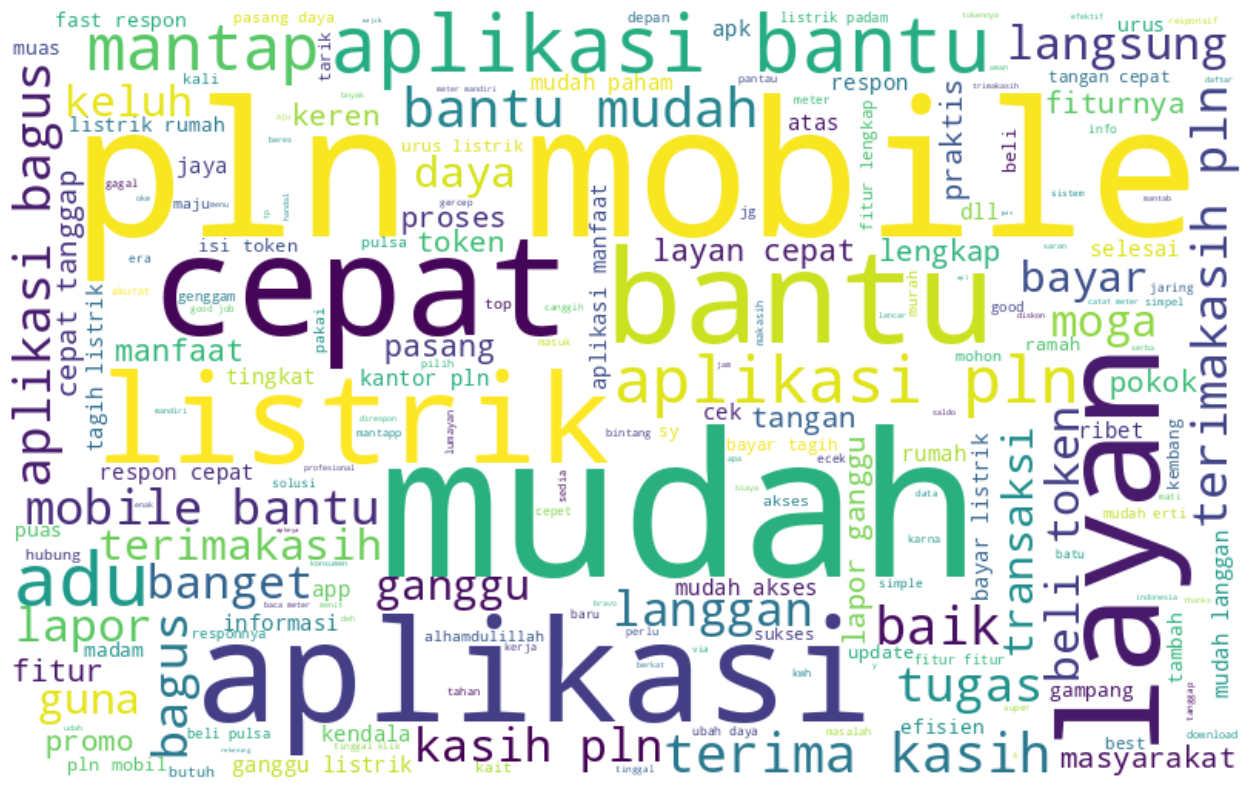

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lem)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [ ]:
df_p=df[df['Sentimen']=='Negatif']
all_words_lem = ' '.join([' '.join(word_list) for word_list in df_p['stemmed_tokenized']])

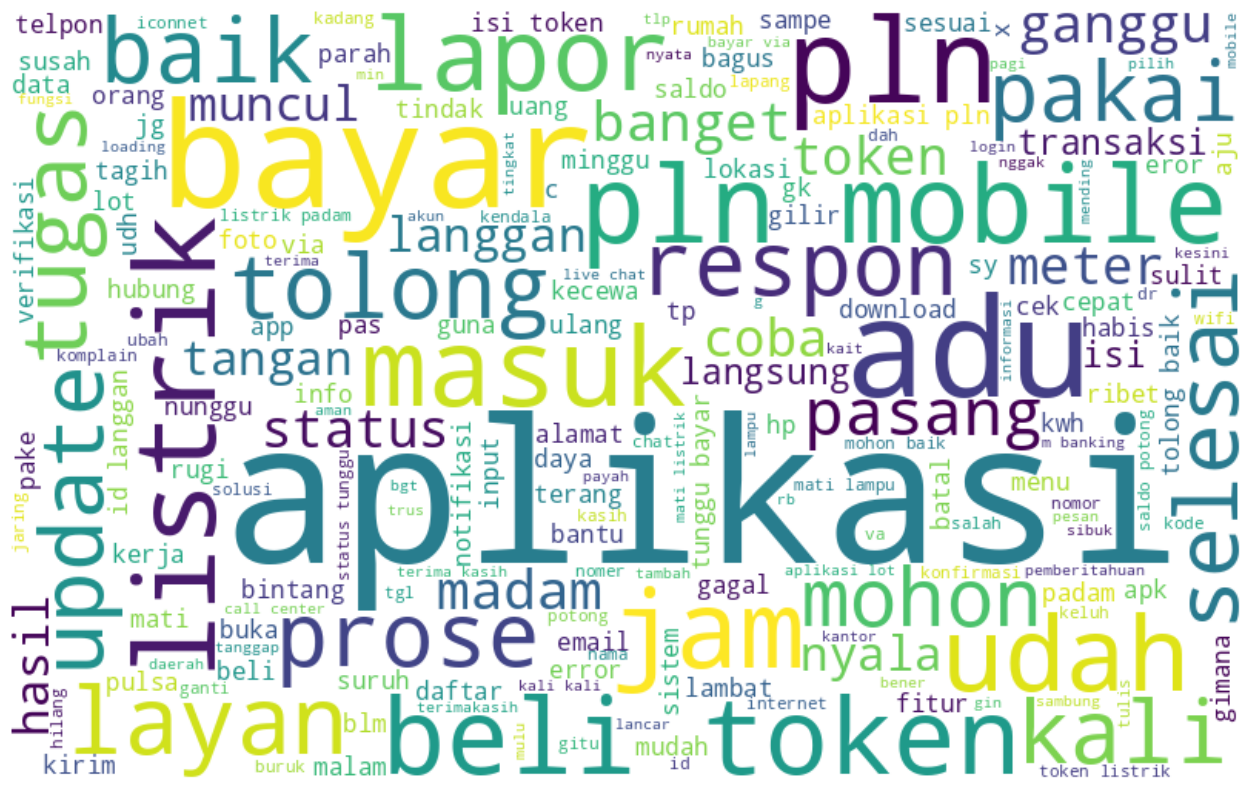

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lem)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [ ]:
df.to_csv('final_data.csv', index=False)